# INTRODUCTION TO DATA SCIENCE AND ANALYTICS
## ASSIGNMENT 1
## DUE DATE: 11/5/18, 11:59 pm

# Importing packages and libraries

In [84]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install nltk
!pip install wordcloud
!pip install mglearn

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [85]:
!pip install bs4

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [86]:
from nltk import word_tokenize

In [87]:
from wordcloud import WordCloud

In [88]:
import pandas as pd

In [89]:
import numpy as np

In [90]:
import re

In [91]:
import sklearn

In [92]:
from bs4 import BeautifulSoup

In [93]:
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import matplotlib.style
from matplotlib.pyplot import subplots, pie, axis, show
matplotlib.style.use('ggplot')

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
from sklearn.decomposition import TruncatedSVD

In [96]:
import seaborn as sns

In [97]:
from sklearn.metrics import classification_report

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [99]:
from nltk.stem.porter import *

In [100]:
from nltk.stem.snowball import SnowballStemmer

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting Generic Tweets Txt File to a Dataframe

This CSV fail contains multiple columns like class, ID, date, user, text.

Over here the class value 0 constitutes a negative sentiment and 1 constitues a positive sentiment. We are splitting this file - 70% of the data here is our training set and 30% of the data is our testing set. The training data would be used for building the model and for validating the model. 

The model over here is continuously refined in an iterative manner to achieve a good performance. We will then use this on the testing set to achieve the desired characteristic.

In [105]:
# Converting the Generic Tweets file into a dataframe
df = pd.read_csv('/resources/data/DATA SCIENCE ASSIGNMENT 1/generic_tweets.txt')

In [106]:
# Naming the columns
df.columns = ['sentiments','a','b','c','d','tweets']

In [107]:
# Dropping unnecessary columns
df = df.drop('d', 1)

In [108]:
# Dropping unnecessary columns
df = df.drop('a', 1)

In [109]:
# Dropping unnecessary columns
df = df.drop('b', 1)

In [110]:
# Dropping unnecessary columns
df = df.drop('c', 1)

In [111]:
# Creating a new column called score and outputting a value 1, if the sentiment is greater than 0 and 0 if the value is equal to 0
df['score'] = df['sentiments'].apply(lambda x: 1 if x > 0 else 0)



In [112]:
# Dropping the unnecessary columns
df =  df.drop('sentiments', 1)

# GENERIC TWEETS PRE PROCESSING & DATA CLEANING
 
# Punctuation, Special Characters, URL removal

The preprocessing process was achieved by defining a function and a) using the replace() fuction to replace any special characteristics, html tags, attributes in the text column with an empty string.We also remove any URL's that point photos, websites etc. 

# Username and Hashtag Removal 

Using the regular expression operation to remove any urls, usernames, hashtags in the text column with an empty string in the text column 

# Lower Casing 

As we will be using the frequency of the words as a feature in the model, it is imperative to prevent the case of the words to lead to imporper classification of the sentiment. Hence, we will convert the entire text column to lower case.

# Removing stop words
 
We are removing all stop words from our text column. A word in considered a stop word if it is in the stop.txt file. Hence, if a word is present both in the stop.txt file and the text column, we will remove it from the text column because that is not necessary for the classification process. 

# TOKENIZATION & STEMMING
This is an important step in data preprocessing because a majority of tweets use words with the same root. Hence, removing those different derived words and including just the root word is extremely important. 
The algorithm for stemming is Porters Algorithm. We will be using the NLTK (Natural Language Tool Kit) to achieve this.

In [113]:
# Creating a function to clean the text column 
def clean(tw):
    tw = tw.replace('(','')
    tw = tw.replace(')','')
    tw = tw.replace('/','')
    tw = tw.replace('-','')
    tw = tw.replace('!','')
    tw = tw.replace('-','')
    tw = tw.replace('#','')
    tw = tw.replace('.','')
    tw = tw.replace("'",'')
    tw = tw.replace(';','')
    tw = tw.replace('_','')
    tw = tw.replace(',','')
    tw = tw.replace('?','')
    tw = tw.replace(':','')
    tw = tw.replace('~','')
    tw = tw.replace('`','')
    tw = tw.replace('%','')
    tw = tw.replace('$','')
    tw = tw.replace('^','')
    tw = tw.replace('*','')
    tw = tw.replace('+','')
    tw = tw.replace('=','')
    tw = tw.replace('|','')
    tw = tw.replace('{','')
    tw = tw.replace('}','')
    tw = tw.replace('[','')
    tw = tw.replace(']','')
    tw = tw.replace('"','')
    tw = re.sub(r'@[A-Za-z0-9]+','',tw)
    tw = re.sub(r'_[A-Za-z0-9]+','',tw)
    tw = re.sub(r'&[A-Za-z0-9]+','',tw)
    tw = re.sub(r'http[A-Za-z0-9]+','',tw)
    tw = re.sub(r'[0-9]+','',tw)
    tw = tw.lower()
    return tw


In [114]:
# Applying the clean function to the text column
df['new_tweets'] = df['tweets'].apply(clean)

In [115]:
df['new_tweets'] = df['new_tweets'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

In [116]:
# Creating a variable stop and reading in the the stop.txt file
stop = open('/resources/data/DATA SCIENCE ASSIGNMENT 1/stop_words.txt','r').read()

In [117]:
stop.split('\n')

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'can',
 'ca

In [118]:
# Applying the stop variable to the text column to remove all the stop words from the column
df['new_tweets'] = df['new_tweets'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop))


In [119]:
# Dropping the unnecessary columns
df = df.drop('tweets', 1)

In [120]:
# Generating new column called length for visualization purpose
df['length'] = df['new_tweets'].apply(len)
df.head()

,score,new_tweets,length
0,0,awww bummer shoulda david carr third day,40
1,0,upset update facebook texting cry school today...,51
2,0,dived ball managed save rest bounds,35
3,0,feels itchy fire,16
4,0,behaving,8


In [121]:
# Tokenization
tokenized_tweet = df['new_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0     [awww, bummer, shoulda, david, carr, third, day]
1    [upset, update, facebook, texting, cry, school...
2           [dived, ball, managed, save, rest, bounds]
3                                 [feels, itchy, fire]
4                                           [behaving]
Name: new_tweets, dtype: object

In [122]:
# Stemming
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0     [awww, bummer, shoulda, david, carr, third, day]
1    [upset, updat, facebook, text, cri, school, to...
2               [dive, ball, manag, save, rest, bound]
3                                  [feel, itchi, fire]
4                                              [behav]
Name: new_tweets, dtype: object

In [123]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['stemmed_tweets'] = tokenized_tweet


In [124]:
df.head()

,score,new_tweets,length,stemmed_tweets
0,0,awww bummer shoulda david carr third day,40,awww bummer shoulda david carr third day
1,0,upset update facebook texting cry school today...,51,upset updat facebook text cri school today blah
2,0,dived ball managed save rest bounds,35,dive ball manag save rest bound
3,0,feels itchy fire,16,feel itchi fire
4,0,behaving,8,behav


# Converting US Airline Txt File to a Dataframe

The US Airline text file will be converted to a dataframe in a similar fashion. We will be applying the same Data Cleaning and Preprocessing step to the text of a each airline. Our goal is to perform sentiment analysis on the Generic Tweets file using the model we developed and gain insights to throw light upon peoples opinion on US Airlines.

In [125]:
# Converting the US Airline text file to a dataframe
df1 = pd.read_csv('/resources/data/DATA SCIENCE ASSIGNMENT 1/US_airline_tweets.csv')

In [126]:
# Dropping the unnecessary columns
df1 = df1.drop('id',1)

In [127]:
# Dropping the unnecessary columns
df1 = df1.drop('retweet_count',1)

# Data Cleaning - US Airline txt file
PREPROCESSING STEPS:
- Punctuation removal, Special Characters removal, URL removal, Username removal, Hashtag removal, Stop Words removal, Lower Casing, Tokenization and Stemming

The US Airline text file contains columns like Id, Retweet Count, Text, Sentiment. We will test the above model on 100% of the US Airline file. Predicting the sentiment of a tweet regarding a specific airline is the goal of the assignment based on the model that was trained and tested on the Generic Tweets Text file. The question answered here is what can public opinion on twitter tell us about peoples opinions on US Airlines. 

In [128]:
# Creating a column called sentiment_score and adding a value of 1 if the sentiment is positive and 0 if the sentiment is negative
df1['sentiment_score'] = df1['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [129]:
# Defining a function to clean the text 
def clean1(uw):
    uw = uw.replace('(','')
    uw = uw.replace(')','')
    uw = uw.replace('/','')
    uw = uw.replace('-','')
    uw = uw.replace('!','')
    uw = uw.replace('-','')
    uw = uw.replace('#','')
    uw = uw.replace('.','')
    uw = uw.replace("'",'')
    uw = uw.replace(';','')
    uw = uw.replace('_','')
    uw = uw.replace(',','')
    uw = uw.replace('?','')
    uw = uw.replace(':','')
    uw = uw.replace('~','')
    uw = uw.replace('`','')
    uw = uw.replace('%','')
    uw = uw.replace('$','')
    uw = uw.replace('^','')
    uw = uw.replace('*','')
    uw = uw.replace('+','')
    uw = uw.replace('=','')
    uw = uw.replace('|','')
    uw = uw.replace('{','')
    uw = uw.replace('}','')
    uw = uw.replace('[','')
    uw = uw.replace(']','')
    uw = uw.replace('"','')
    uw = re.sub(r'_[A-Za-z0-9]+','',uw)
    uw = re.sub(r'&[A-Za-z0-9]+','',uw)
    uw = re.sub(r'http[A-Za-z0-9]+','',uw)
    uw = re.sub(r'[0-9]+','',uw)
    uw = uw.lower()
    return uw

In [130]:
# Applying the clean function to the text column 
df1['text'] = df1['text'].apply(clean1)

 #  -- Retrieve the airline from the tweets column
 - we applied a function that would be taking an empty list and finding all patterns that start with an @ followed by a bunch of aplhabets. The firsst value would then be appended to the empty list if the length of the values after finding that pattern is greater than 1.
 - This list would then be returned in the function and then the function is applied to a new column called airline in the dataframe.
 - We also created an airline list so that only specific airline names are retrieved using the function, otherwise unecessary names that start with an @ would also be returned to the airline column. 
 - Once all this performed, we just extract the first value in the list assuming that the specific tweet talks about the first airline which has been tagged using the twitter handle. 
 - We would be using this column to perform different types of visualizations

In [131]:
# Defining a function to find the specific pattern mentioned below
def split_it(airline):
    l=[]
    for y in airline.split():
        x = re.findall(r'(?:@[\w_]+)', y)
        if len(x) > 0: 
            l.append(x[0])
        
    return l
df1['airline'] = df1['text'].apply(split_it)

In [132]:
# Creating a list with all the airline names to prevent unnecessary words that start with @ to show up in the airline column
airline_names = ['@alegiantair','@jetblue','@virginamerica','@unitedairlines','@virginatlantic','@southwestair','@united','@aegeanairlines','@silverairways','@delta','@usairways','@aircanada','@southwest','@deltaassist','@americanair','@alaskaair','@spiritairlines', '@jetblue']

In [133]:
df1['airline'] = df1['airline'].apply(lambda x: list(k for k in x if k in airline_names))

In [134]:
# Getting the first element from the list l
df1['airline'] = df1['airline'].apply(lambda x: x[0] if len(x) > 0 else '')

In [135]:
# Splitting the text column into words so that the stop variable can be applied later on and iterated
df1['text'] = df1['text'].apply(lambda x: x.split())

In [136]:
# Applying the stop variable to the text column to get rid of the stop words in the text column
df1['text'] = df1['text'].apply(lambda x: ' '.join(k for k in x if k not in stop))


In [137]:
# Creating a function to remove all words that start with @ in the text column
def clean2(vw):
    vw = re.sub(r'@[A-Za-z0-9]+','',vw)
    return vw


In [138]:
# Applying the previously created function to the text column to remove any characters that start with an @
df1['text'] = df1['text'].apply(clean2)

In [139]:
df1['text'] = df1['text'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

In [140]:
# Tokenization
tokenized_tweet_US = df1['text'].apply(lambda x: x.split())
tokenized_tweet_US.head()

0              [youve, commercials, experience, tacky]
1    [aggressive, blast, obnoxious, entertainment, ...
2                                           [big, bad]
3    [seriously, pay, flight, seats, didnt, playing...
4                              [vx, ear, worm, won, t]
Name: text, dtype: object

In [141]:
# Stemming
tokenized_tweet_US = tokenized_tweet_US.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_tweet_US.head()

0                      [youv, commerci, experi, tacki]
1    [aggress, blast, obnoxi, entertain, guest, fac...
2                                           [big, bad]
3    [serious, pay, flight, seat, didnt, play, bad,...
4                              [vx, ear, worm, won, t]
Name: text, dtype: object

In [142]:
for i in range(len(tokenized_tweet_US)):
    tokenized_tweet_US[i] = ' '.join(tokenized_tweet_US[i])

df1['stemmed_text'] = tokenized_tweet_US
df1.head()

,sentiment,negative_reason,user,text,sentiment_score,airline,stemmed_text
0,positive,NaN,jnardino,youve commercials experience tacky,1,@virginamerica,youv commerci experi tacki
1,negative,Bad Flight,jnardino,aggressive blast obnoxious entertainment gues...,0,@virginamerica,aggress blast obnoxi entertain guest face recours
2,negative,Can't Tell,jnardino,big bad,0,@virginamerica,big bad
3,negative,Can't Tell,jnardino,seriously pay flight seats didnt playing bad ...,0,@virginamerica,serious pay flight seat didnt play bad fli
4,positive,NaN,cjmcginnis,vx ear worm won t,1,@virginamerica,vx ear worm won t


# Generic Tweets - Visualization
# NEGATIVE SENTIMENT TWEETS

We developed a wordcloud to plot the most common words that constitute a negative sentiment. This is a good visualization tool especially in the case when we are tring to compare the words that frequent most commonly in the case of a negative sentiment and vice versa. However, an important thing to remember here is that DATA CLEANING AND PREPROCESSING should be performed before performing this wordcloud visualization. This would prevent unnecessary words from clouding our sentiment analysis process. 

Visualization using wordcloud for the negative tweets


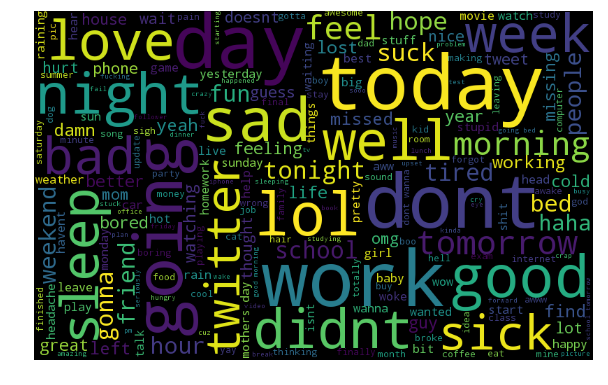

In [143]:
print('Visualization using wordcloud for the negative tweets')
DF = df[df['score'] == 0]
all_words = ' '.join([text for text in DF['new_tweets']])
wordcloud_a = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_a, interpolation="bilinear")
plt.axis('off')
plt.show()

# POSITIVE SENTIMENT TWEETS

A wordcloud is extremely lucrative when we are trying to plot the most common words that denote a specific aspect of a tweet, in this case it is positive sentiment vs negative sentiment. The visualization helped us see that words like suck, night, bad are most commonly found in the case of a negative sentiment. Whereas, words like good, work, great, happy, better are the ones that are commonly noticed in the case the tweet has a positive sentiment. 

Visualization using wordcloud for the positive tweets


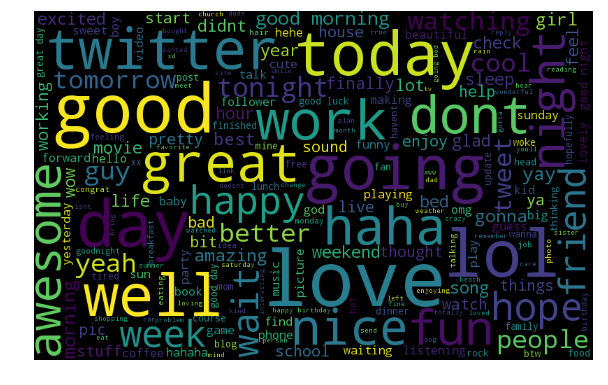

In [144]:
print('Visualization using wordcloud for the positive tweets')
DF1 = df[df['score'] == 1]
all_words1 = ' '.join([text for text in DF1['new_tweets']])
wordcloud_b = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words1)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_b, interpolation="bilinear")
plt.axis('off')
plt.show()

# Plotting length of tweet against sentiment
We performed visualization by plotting the length of the tweet aginst its sentiment to see if any correlation exists between the length of the tweet and the sentiment. However, once we plotted both the sentiments with the length as the independent variable - No Correlation could be deduced as both the positive and negative sentiment potrayed a similar behaviour when plotted against the length of the tweet.

Length of tweets by Sentiment


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37c23dfa20>,
      dtype=object)

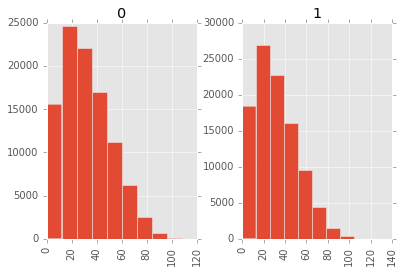

In [145]:
print('Length of tweets by Sentiment')
df.hist('length',by='score')

# US Airlines - Visualization
# NEGATIVE SENTIMENT TWEETS

We used wordcloud visualization again to see what were the most common words associated with a negative sentiment in the US Airline File. Some of the words were delayed, customer service, waiting, flight cancelled. Some of these constitute the reason behind the negative sentiment. In our US Airline file - we have 10 reasons for negative sentiment and we will analyze those later on.

Visualization using wordcloud for the negative tweets


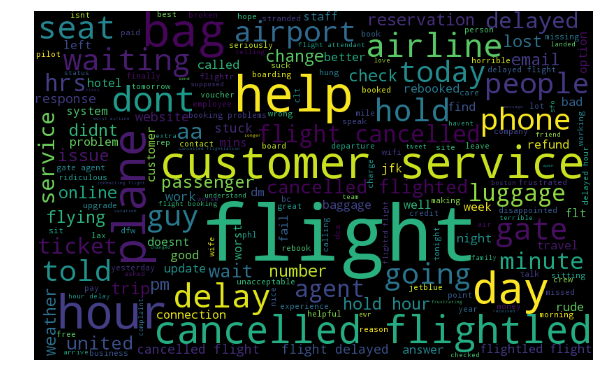

In [146]:
print('Visualization using wordcloud for the negative tweets')
DF_US = df1[df1['sentiment_score'] == 0]
all_words_US = ' '.join([text for text in DF_US['text']])
wordcloud_c = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_US)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_c, interpolation="bilinear")
plt.axis('off')
plt.show()

# POSITIVE SENTIMENT TWEETS

Wordcloud for the positive sentiment tweets threw light upon some of the most common words that can be seen when the sentiment of the tweet is positive. Some of these words were great, amazing, best trip, love, helpful, good etc.

These wordclouds are a critical step in our visualization process as they help us realize that the sentiment of a tweet relies heavily on the text that constitutes the tweet. This has motivated us to use the frequency of these words as the feature of our model. These independent variables will predict our dependent variable - positive or negative sentiment. 

Visualization using wordcloud for the positive tweets


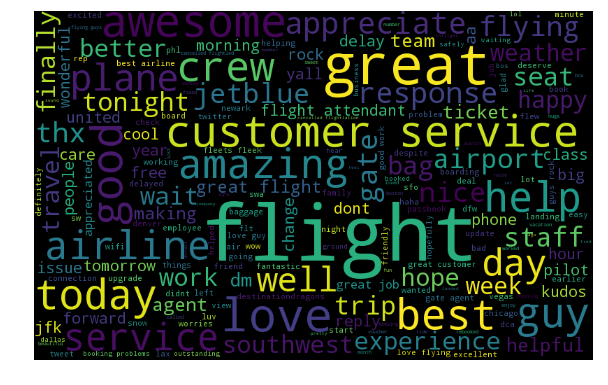

In [147]:
print('Visualization using wordcloud for the positive tweets')
DF_US1 = df1[df1['sentiment_score'] == 1]
all_words_US1 = ' '.join([text for text in DF_US1['text']])
wordcloud_c1 = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_US1)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_c1, interpolation="bilinear")
plt.axis('off')
plt.show()

# DISTRIBUTION OF THE US AIRLINES

The most important insight regarding the distribution of the airlines can be drawn by plotting a bar graph of the airlines in the US Airline File with their sentiments. 

From the graph it is clearly evident that all 6 airlines have more negative sentiments associated with the tweets than positive sentiments. The majority of the tweets referred to the UNITED AIRLINES. This tells us that UNITED is the most popular out of all the 6 airlines. However, VIRGIN AMERICA constitutes only a small proportion of the population signifying that it was not a popular airline in the US used for travelling in 2015. 

The other airlines that enjoyed a decent popularity were SOUTHWEST, JETBLUE AND AMERICAN AIR.

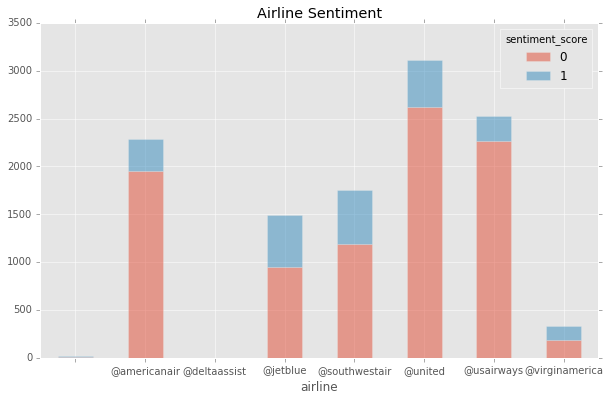

In [148]:
pd.crosstab(index = df1["airline"],columns = df1["sentiment_score"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

In [149]:
airline_senti = pd.crosstab(df1.airline, df1.sentiment_score)


In [150]:
percent=airline_senti.apply(lambda a: a / a.sum() * 100, axis=1)


# ALTERNATIVE VISUALIZATION
Plotting percentage of sentiment by the airline to visualize the distribution of the airlines in an alternative way. 

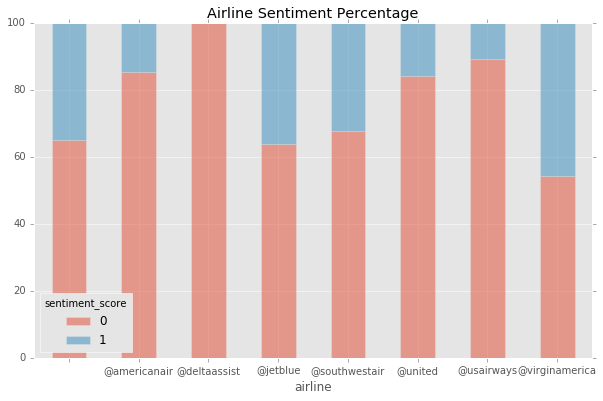

In [151]:
percent.plot(kind='bar',figsize=(10, 6),alpha=0.5,
                rot=0,stacked=True,title="Airline Sentiment Percentage")

# VISUALIZATION OF TOTAL POSITIVE AND NEGATIVE SENTIMENTS BY AIRLINE - seperate graphs

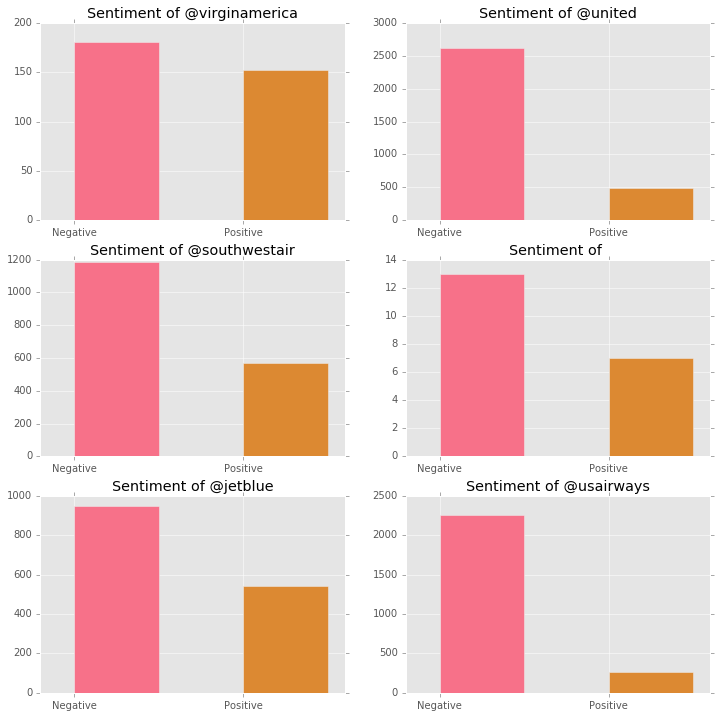

In [152]:
# Plotting total positive and negative sentiments by airline
def plot_sub_sentiment(Airline):
    pdf = df1[df1['airline']==Airline]
    count = pdf['sentiment_score'].value_counts()
    Index = [1,2]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Positive'])
    plt.title('Sentiment of' + " " + Airline)

airline_name = df1['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

# TOTAL No. Of Tweets of each Airline

Plot of Total no. tweets each airline has received


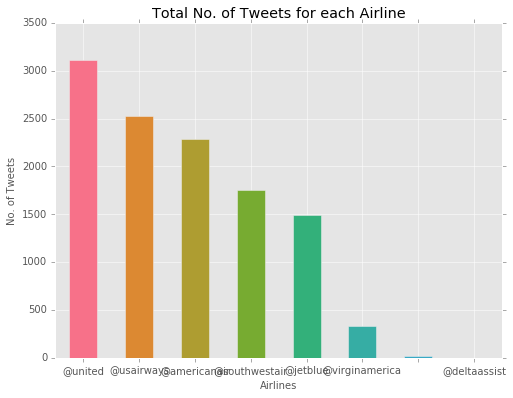

In [153]:
# Plotting total no. of tweets each airline has recieved
print('Plot of Total no. tweets each airline has received')
colors=sns.color_palette("husl", 10) 
pd.Series(df1["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airline")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

# TOTAL NEGATIVE REASONS 
This will tell us about the different reasons that make up the sample of the negative sentiment tweets in the US Airline File.

From the graph it can be deduced that the maximum number of issues were related to customer service and the least amount of problems came from damaged luggage.

Plot of all negative reasons


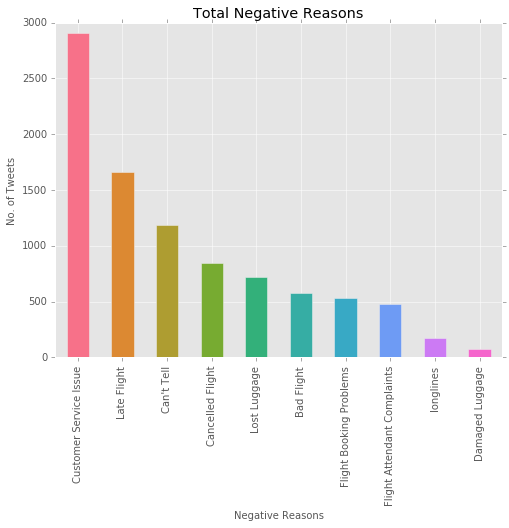

In [154]:
print('Plot of all negative reasons')
color=sns.color_palette("husl", 10)
pd.Series(df1["negative_reason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

# TOP 5 NEGATIVE REASONS 
This will throw light upon the top 5 negative reasons that constitute a negative sentiment in the US Airline File. 
This is a good tactic to pursue while performing visualization as we will be able to gain insights into some of the most common reasons behind denoting a negative sentiment to a tweet.

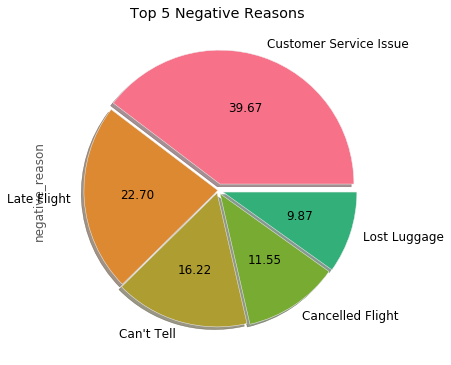

In [155]:
color=sns.color_palette("husl", 10)
pd.Series(df1["negative_reason"]).value_counts().head(5).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,
                fontsize=12,figsize=(6, 6),title="Top 5 Negative Reasons")

## MODEL PREPERATION - LOGISTIC REGRESSION

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. To represent categorical outcome, we use dummy variables. To make things much simpler, a Logistic Regression model predicts the probability of occurrence of an event.


# TF-IDF VECTORIZER - Features
In a logistic regression model there are two parameters, X & Y. X is the independent variable and Y is the dependent variables. The dependent variable is a catogorical variable that accepts only binary values: 0 - Negative Sentiment, 1 - Positive Sentiment. 

X in our case would be the frequency of each word, which would be the feature of the model. To attain the frequency of each word, we will be using the TFIDF vectorizer and fitting and transforming the tweets column in the Generic Tweets file.

TFIDF stands for Term Frequency, Inverse Document Frequency. TFIDF is a way of scoring the importance of words in a document based on how frequently they appear across documents. If a word appears frequently in a document, it is given a high score and vice versa. 

We will be predicting the sentiment of each tweet, which is denoted  by Y and this will be our target variable.


# TRAINING AND TESTING MODEL - GENERIC TWEETS

70% of this model will be our training data set and 30% of this model will be our testing data set.

In [156]:
# Creating a vectorizer 
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
# Fitting and transforming the vectorizer with the clean tweets
tfidf = vectorizer.fit_transform(df['stemmed_tweets'])

/usr/local/lib/python3.5/dist-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [157]:
# Our independent variable is the frequency of the words created by the tfidf vectorizer and our dependent variable is the sentiment score that we will be prediciting.
X = tfidf
Y = df['score']

In [158]:
# Splitting the dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [159]:
# Initializing our Logisitic Regression model
logmodel = LogisticRegression()

In [160]:
# Fitting the model with the X & Y Values - Independent and Dependent Variables
logmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [161]:
# Creating a variable to predict the values based on the chosen model and frequency of words
predictions = logmodel.predict(X_test)

In [162]:
# Creating a classification report to compare the predictions and True Value
print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.74      0.65      0.69     30063
          1       0.69      0.78      0.73     29937

avg / total       0.72      0.71      0.71     60000



In [163]:
# Finding the accuracy of our model based on the True values and Predictions.
accuracy_score(Y_test, predictions) * 100

71.33833333333334

In [164]:
import mglearn

In [ ]:
feature_names =list(X)

### The accuracy of our model is 71.33%

#  MODEL IMPLEMENTATION - US AIRLINES

## We will be applying our previously developed model on 100% of the US Airline Dataset. 

In [ ]:
# Creating a vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
# Fitting and transforming the vectorizer with the text column to generate the frequency of words
tfidf_US = tfidf_vectorizer.fit_transform(df1['stemmed_text'])

In [ ]:
# Our independent variable is the frequency of the words created by the TFIDF vectorizer and our dependent variable is our sentiment score that we will be prediciting.
X_US = tfidf_US
Y_US = df1['sentiment_score']

In [ ]:
# Creating a variable for predictions to predict the sentiment based on our dependent variable - frequency of words
predictions_US = logmodel.predict(X_US)

In [ ]:
# Creating a classification reportt
print(classification_report(Y_US, predictions_US))

In [ ]:
# Getting the accuracy based on the predictions and true values
accuracy_score(Y_US, predictions_US) * 100

### The accuracy of our model is 54.35%

# Negative Reasons - Us Airlines

We will split the new dataframe that contains only the negative values into training and testing set. The training set would include 70% of the dataset and the testing set will include 30% of the dataset.

In [ ]:
# We create a new dataframe just to include all the negative reasons and associated tweets so that we can train and test a model with only the negative reasons 
df2 = df1[~df1.sentiment.str.contains("positive")]


In [ ]:
# Creating a Vectorizer
vectorizer_a = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [ ]:
# Fitting and transforming the vectorizer with the clean text column to generate the frequency of words used as a feature in our model
New_tfidf = vectorizer_a.fit_transform(df2['stemmed_text'])

In [ ]:
# Our independent variable is the frequency of the words we created using the TFIDF vectorizer and our dependent variable is the sentiment we will be predicting
New_X = New_tfidf
New_Y = df2['negative_reason']

In [ ]:
# Splitting the dataset into training and test set
New_X_train, New_X_text, New_Y_train, New_Y_test = train_test_split(New_X, New_Y, test_size = 0.3, random_state = 1)

In [ ]:
# Calling the model and storing the value in a variable
New_logmodel = LogisticRegression()

In [ ]:
# Fitting the X & Y values in the model initialized before
New_logmodel.fit(New_X_train, New_Y_train)

In [ ]:
# Creating a variable to predict the values based on the frequency of the words
New_predictions = New_logmodel.predict(New_X_text)

In [ ]:
# Creating a Classification report for our model
print(classification_report(New_Y_test, New_predictions))

In [ ]:
# Deriving the Accuracy of the model built based on the predictions and our true values
accuracy_score(New_Y_test, New_predictions) * 100

### The accuracy of our model is 61.51%

# DISCUSSION - MODEL 1 


In [ ]:
# Creating a new dataframe to plot the predicted value based on the US Airline data file, the airline name and the true value based on our data file.
airline_US = df1['airline']
resultsDF1 = pd.DataFrame({
        'true':Y_US,
        'predicted': predictions_US,
        'airline' : airline_US
         
    })
# Creating a new dataframe that would only contain values necessary for our analysis: DELTA constitutes a very small proportion making it insignificant
resultsDF2 = resultsDF1[~resultsDF1.airline.str.contains("@deltaassist")]


In [ ]:
new_senti = pd.crosstab(resultsDF2.airline, resultsDF2.predicted)
senti_X = new_senti.drop('')

In [ ]:
# Plotting percentage of negative and positive sentiments for each airline
percent_A = senti_X.apply(lambda a: a / a.sum() * 100, axis=1)
percent_A

# WHAT CAN PUBLIC OPINION ON TWITTER TELL US ABOUT THE US AIRLINES IN 2015

Based on the values predicted from the model and plotting those values against each airline, we can see that the airline that lived an evergreen popularity in the year 2015 was VIRGIN AMERICA. This is clearly evident from the graph as the ratio of percentage positive tweets to negative tweets is greatest for VIRGIN AMERICA. 

Followed by VIRGIN AMERICA, the second most popular airline based on the values predicted from our MODEL was AMERICAN AIR. The ratio of percentage positive to negative tweets over here was less than VIRGIN AMERICA, however greater than the other airlines.

The third most popular airline in the year 2015 was JETBLUE based on our model, followed by SOUTHWEST AIR. 

The second to last airline in terms of popularity was UNITED AIRLINES. The most unpoluar airline in the year 2015, was US AIRWAYS.


In [ ]:
percent_A.plot(kind='bar',figsize=(8, 6),alpha=0.5,
                rot=0,stacked=True,title="Airline Sentiment Percentage")

## DISCUSSION - MODEL 2

# JUSTIFYING MODELS FAILED PREDICTIONS

Based on filtering out what the actual prediction was and what the true value is, we could see a bunch of mishaps. 

For example: 1) Missed Late Flight Sample: for index number 516, we can see that the true prediction was LATE FLIGHT, however, based on the model the prediction was Cancelled Flight. Because the feature of our model was based on the frequency of the words and for the clean text in row 516, we can see that the tweet started with the word "cancelled". This could have led to the misclassification because of a keyword 'Cancelled' present in the tweet. Similarly, for index 1481 the true value was LATE FLIGHT, however, the prediction was Customer Service Issue. This could have happened due to the keyword 'customer' present in the tweet.

2) MISSED CUSTOMER SERVICE ISSUE SAMPLE: For index 2487 we can see that the true value was CUSTOMER SERVICE ISSUE however, the predicted value was FLIGHT BOOKING PROBLEM. The main reason for this misclassification is that the tweet in index 2487 begins with the word 'booked' and the presence of this keyword could have led to the confusion, thereby, leading to the misclassification. 

3) MISSED LOST LUGGAGE SAMPLE: For index 7820, we can see that the true value was Lost Luggage issue, however, the predicted value was Late Flight. Yet another reason for this misclassification could have been the keyword 'delayed' in the index 7820,leading to this misclassification. 

In [ ]:
# Creating a dataframe to plot our predictions for the negative reason and true value for the negative reason 
resultsDF = pd.DataFrame({
        'true':New_Y_test,
        'predicted':New_predictions,
        
        
    })


#around 3671 values are incorrect

In [ ]:
# Finding those values for which the true value was LATE FlIGHT, however, the predicted values were something else.
print ('Missed Late Flight samples')
resultsDF[(resultsDF['true'] == 'Late Flight') & (resultsDF['predicted'] != 'Late Flight')].head()

In [ ]:
df1.text[516]

In [ ]:
df1.text[1481]

In [ ]:
print ('Missed Customer Service Issue samples')
resultsDF[(resultsDF['true'] == 'Customer Service Issue') & (resultsDF['predicted'] != 'Customer Service Issue')].head()

In [ ]:
df1.text[2487]

In [ ]:
print ('Missed Lost Luggage samples')
resultsDF[(resultsDF['true'] == 'Lost Luggage') & (resultsDF['predicted'] != 'Lost Luggage')].head()

In [ ]:
df1.text[7820]

# BONUS SECTION 
# ALTERNATIVE MODEL - A decision tree is one of most frequently and widely used supervised machine learning algorithms that can perform both regression and classification tasks

# DECESION TREE CLASSIFIER - GENERIC TWEETS

In [ ]:
# Importing Decision Tree Classifier from SKLEARN
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initializing our dependent and independent variables
Xdt = tfidf
Ydt = df['score']

In [ ]:
# Splitting the dataset intro training and test set
Xtrain_dt, Xvalid_dt, Ytrain_dt, Yvalid_dt = train_test_split(Xdt, Ydt, test_size = 0.3, random_state = 42)

In [ ]:
# Calling the model and storing the value in a variable
D_tree = DecisionTreeClassifier()

In [ ]:
# Fitting the model with the Dependent and Independent variable values
D_tree.fit(Xtrain_dt, Ytrain_dt)

In [ ]:
# Making predictions based on our independent variable - frequency of words
prediction_DT = D_tree.predict(Xvalid_dt)

In [ ]:
# Creating a classification report to compare the True Vs. Predicted Values
print(classification_report(Yvalid_dt, prediction_DT))

In [ ]:
# Getting an accuracy score based on our predictions vs the true values stored in the Y variable
accuracy_score(Yvalid_dt, prediction_DT) * 100

## The accuracy is 66.69%

# DECISION TREE CLASSIFIER - US AIRLINES

In [ ]:
# Creating a vectorizer
dt_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# Fitting and transforming the vectorizer with the text column to create features of the words
dt_US = tfidf_vectorizer.fit_transform(df1['stemmed_text'])
# Defining X & Y variables - model parameters
US_dt = dt_US 
Y_dt = df1['sentiment_score']

In [ ]:
# Making predictions based on the model specified and our independent variables
DT_prediction = D_tree.predict(US_dt)

In [ ]:
# Printing a classification report to compare the true vs predicted values
print(classification_report(Y_dt, DT_prediction))

In [ ]:
# Getting an accuracy based on the true value and the predicted value
accuracy_score(Y_dt, DT_prediction) * 100

## The accuracy is 56.4%

# DECISION TREE CLASSIFIER - NEGATIVE REASONS 

In [ ]:
# Creating a vectorizer
vectorizer_b = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [ ]:
# Fitting and transforming the vectorizer with the clean text column to generate the frequency of words
New_dt = vectorizer_b.fit_transform(df2['stemmed_text'])

In [ ]:
# Initializing the X & Y variables
dt_X = New_dt
dt_Y = df2['negative_reason']

In [ ]:
# Splitting the dataset intro training and test set 
dt_X_train, dt_X_test, dt_Y_train, dt_Y_test = train_test_split(dt_X, dt_Y, test_size = 0.3, random_state = 1)

In [ ]:
# Calling a model and storing the value in a variable
New_tree = DecisionTreeClassifier()

In [ ]:
# Fitting the x & Y values in the model
New_tree.fit(dt_X_train, dt_Y_train)

In [ ]:
# Creating predictions based on the independent variable - Frequency of words 
prediction_New = New_tree.predict(dt_X_test)

In [ ]:
# Creating a classification report to compare the predictions with the true values
print(classification_report(dt_Y_test, prediction_New))

In [ ]:
# Generating an accuracy score based on the true values and the predicted values from the model
accuracy_score(dt_Y_test, prediction_New) * 100

## The accuracy is 51.85%

## Based on the three accuracy values obtained from the decision tree classifier , we can see that for each, the accuracy was lower than what we predicted from the Logistic Regression Model. Hence, I would prefer a Logistic Regression model over Decision Tree Classifier.   